####################
July 2nd, 2025
Balancing coolers

Loading in some libraries

In [2]:
import sys
import gzip
import matplotlib.pyplot as plt
import numpy as np
import cooler
import pandas as pd
import cooltools

Ploting the unbalanced merged diploid cooler

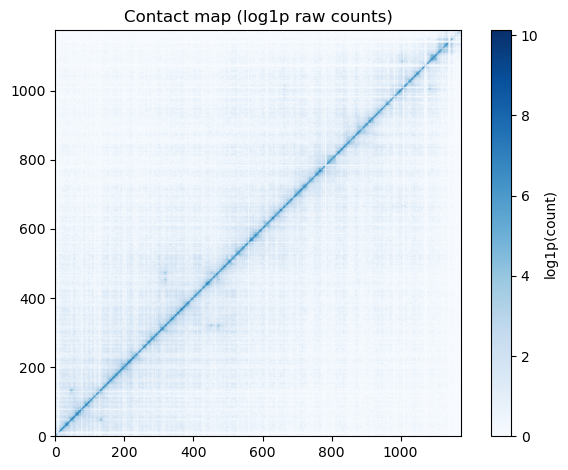

In [3]:
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_diploidGenome.20kb.cool")

mat = clr.matrix(balance=False).fetch("2L_JJg14_057")

plt.imshow(np.log1p(mat), cmap="Blues", origin="lower")
plt.title("Contact map (log1p raw counts)")
plt.colorbar(label='log1p(count)')
plt.tight_layout()
plt.show()

Balancing the cooler

In [4]:
cool_path = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_diploidGenome.20kb.cool"
balanced_cool_path = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_balanced.20kb.cool"

chromsizes_path = "/data/alhajabed/FlyHiC/PoreC/diploid_genome.chromsizes"
chromsizes = pd.read_csv(chromsizes_path, sep="\t", header=None, names=["chrom", "size"])

clr = cooler.Cooler(cool_path)

mat = clr.matrix(balance=False).fetch("2L_JJg14_057")
print("NaNs present:", np.isnan(mat).any())
print("Zeros on diagonal:", np.any(np.diag(mat) == 0))
print("Rows with all zeros:", np.sum(np.all(mat == 0, axis=1)))
print("Cols with all zeros:", np.sum(np.all(mat == 0, axis=0)))

# Run balancing
weights, stats = cooler.balance_cooler(clr, max_iters=1000, tol=1e-5)

print("Balancing stats:", stats)
print("Weights head:", weights[:10])

# Attach weights to the bins table
bins = clr.bins()[:]
bins["weight"] = weights  



# Save the balanced cooler file
cooler.create_cooler(
    balanced_cool_path,
    bins=bins,
    pixels=clr.pixels()[:],
    metadata={"chromsizes": dict(zip(chromsizes["chrom"], chromsizes["size"]))}  # Add chromsizes to metadata
)

print(f"Balanced cooler saved to {balanced_cool_path}")

clr_cool = cooler.Cooler(balanced_cool_path)
print(clr_cool.info)

NaNs present: False
Zeros on diagonal: True
Rows with all zeros: 1
Cols with all zeros: 1


/localenv/erikson/anaconda/envs/PoreC/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/localenv/erikson/anaconda/envs/PoreC/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Balancing stats: {'tol': 1e-05, 'min_nnz': 10, 'min_count': 0, 'mad_max': 5, 'cis_only': False, 'ignore_diags': 2, 'scale': 145220.78194863952, 'converged': True, 'var': 9.792406124760614e-06, 'divisive_weights': False}
Weights head: [0.01510998 0.02115341 0.01241457 0.01765326 0.01344857 0.01019319
        nan        nan        nan        nan]
Balanced cooler saved to /data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_balanced.20kb.cool
{'bin-size': 20000, 'bin-type': 'fixed', 'creation-date': '2025-07-02T13:48:32.304436', 'format': 'HDF5::Cooler', 'format-url': 'https://github.com/open2c/cooler', 'format-version': 3, 'generated-by': 'cooler-0.10.2', 'genome-assembly': 'unknown', 'metadata': {'chromsizes': {'2L_JJg14_057': 23513712, '2R_JJg14_057': 25286936, '3L_JJg14_057': 28110227, '3R_JJg14_057': 32079331, '4_JJg14_057': 1348131, 'X_JJg14_057': 23542271, 'Y_JJg14_057': 3667352, 'dmel_mitochondrion_genome_JJg14_057': 19517, 'Unmapped_Scaffold_8_JJg14_057': 887

From terminal:
cooler zoomify 20250403_PnMs_merged_balanced.20kb.cool -o 20250403_PnMs_balanced.mcool --resolutions 20000,40000,80000,160000
cooler zoomify 20250403_PnMs_merged_balanced.20kb.cool -o 20250403_PnMs_merged_balanced.20kb.mcool --resolutions 20000,40000,80000,160000


Plotting the balanced cool file

Matrix stats:
Max value: 24921
Min value: 0
NaNs present: False
Rows with all zeros: 1
Columns with all zeros: 1


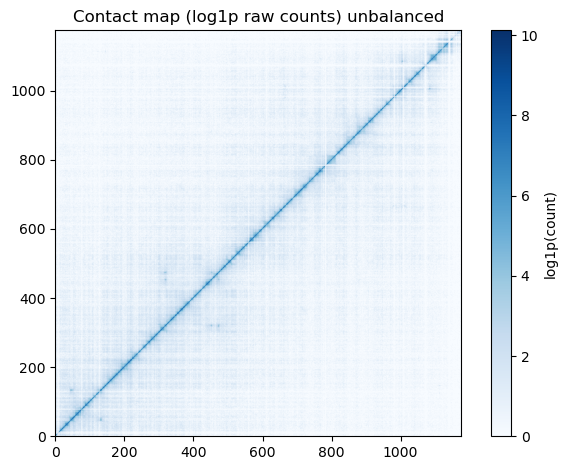

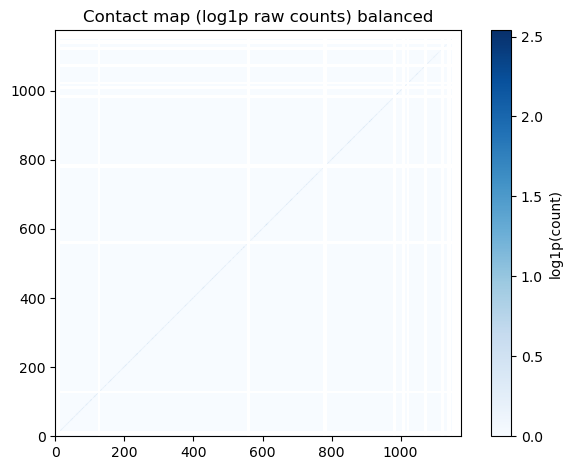

In [ ]:
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_balanced.20kb.cool")


mat = clr.matrix(balance=False).fetch("2L_JJg14_057")

print("Matrix stats:")
print(f"Max value: {np.max(mat)}")
print(f"Min value: {np.min(mat)}")
print(f"NaNs present: {np.isnan(mat).any()}")
print(f"Rows with all zeros: {np.sum(np.all(mat == 0, axis=1))}")
print(f"Columns with all zeros: {np.sum(np.all(mat == 0, axis=0))}")

plt.imshow(np.log1p(mat), cmap="Blues", origin="lower")
plt.title("Contact map (log1p raw counts) unbalanced")
plt.colorbar(label='log1p(count)')
plt.tight_layout()
plt.show()

mat = clr.matrix(balance=True).fetch("2L_JJg14_057")
mat = np.clip(mat, 0, np.percentile(mat, 99))  

plt.imshow(np.log1p(mat), cmap="Blues", origin="lower")
plt.title("Contact map (log1p raw counts) balanced")
plt.colorbar(label='log1p(count)')
plt.tight_layout()
plt.show()



Balancing at 40k resolution

In [6]:
cool_path = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_diploidGenome.40kb.cool"
balanced_cool_path = "/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_balanced.40kb.cool"

chromsizes_path = "/data/alhajabed/FlyHiC/PoreC/diploid_genome.chromsizes"
chromsizes = pd.read_csv(chromsizes_path, sep="\t", header=None, names=["chrom", "size"])

clr = cooler.Cooler(cool_path)

mat = clr.matrix(balance=False).fetch("2L_JJg14_057")
print("NaNs present:", np.isnan(mat).any())
print("Zeros on diagonal:", np.any(np.diag(mat) == 0))
print("Rows with all zeros:", np.sum(np.all(mat == 0, axis=1)))
print("Cols with all zeros:", np.sum(np.all(mat == 0, axis=0)))

# Run balancing
weights, stats = cooler.balance_cooler(clr, max_iters=1000, tol=1e-5)

print("Balancing stats:", stats)
print("Weights head:", weights[:10])

# Attach weights to the bins table
bins = clr.bins()[:]
bins["weight"] = weights  



# Save the balanced cooler file
cooler.create_cooler(
    balanced_cool_path,
    bins=bins,
    pixels=clr.pixels()[:],
    metadata={"chromsizes": dict(zip(chromsizes["chrom"], chromsizes["size"]))}  # Add chromsizes to metadata
)

print(f"Balanced cooler saved to {balanced_cool_path}")

clr_cool = cooler.Cooler(balanced_cool_path)
print(clr_cool.info)

NaNs present: False
Zeros on diagonal: True
Rows with all zeros: 1
Cols with all zeros: 1


/localenv/erikson/anaconda/envs/PoreC/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/localenv/erikson/anaconda/envs/PoreC/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Balancing stats: {'tol': 1e-05, 'min_nnz': 10, 'min_count': 0, 'mad_max': 5, 'cis_only': False, 'ignore_diags': 2, 'scale': 145220.78194863952, 'converged': True, 'var': 9.792406124760614e-06, 'divisive_weights': False}
Weights head: [0.01510998 0.02115341 0.01241457 0.01765326 0.01344857 0.01019319
        nan        nan        nan        nan]
Balanced cooler saved to /data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_balanced.40kb.cool
{'bin-size': 20000, 'bin-type': 'fixed', 'creation-date': '2025-07-02T13:58:15.216218', 'format': 'HDF5::Cooler', 'format-url': 'https://github.com/open2c/cooler', 'format-version': 3, 'generated-by': 'cooler-0.10.2', 'genome-assembly': 'unknown', 'metadata': {'chromsizes': {'2L_JJg14_057': 23513712, '2R_JJg14_057': 25286936, '3L_JJg14_057': 28110227, '3R_JJg14_057': 32079331, '4_JJg14_057': 1348131, 'X_JJg14_057': 23542271, 'Y_JJg14_057': 3667352, 'dmel_mitochondrion_genome_JJg14_057': 19517, 'Unmapped_Scaffold_8_JJg14_057': 887

Plotting the 40kb

Matrix stats:
Max value: 24921
Min value: 0
NaNs present: False
Rows with all zeros: 1
Columns with all zeros: 1


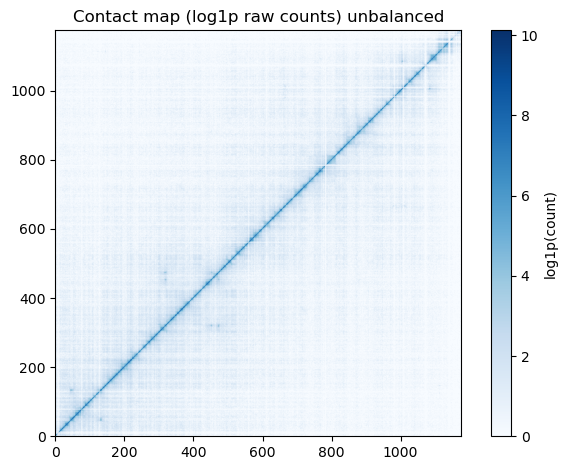

Matrix stats:
Max value: nan
Min value: nan
NaNs present: True
Rows with all zeros: 0
Columns with all zeros: 0


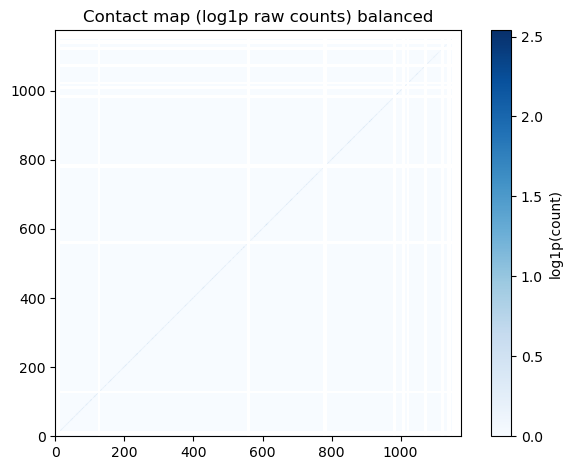

In [8]:
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_balanced.40kb.cool")

mat = clr.matrix(balance=False).fetch("2L_JJg14_057")

print("Matrix stats:")
print(f"Max value: {np.max(mat)}")
print(f"Min value: {np.min(mat)}")
print(f"NaNs present: {np.isnan(mat).any()}")
print(f"Rows with all zeros: {np.sum(np.all(mat == 0, axis=1))}")
print(f"Columns with all zeros: {np.sum(np.all(mat == 0, axis=0))}")

plt.imshow(np.log1p(mat), cmap="Blues", origin="lower")
plt.title("Contact map (log1p raw counts) unbalanced")
plt.colorbar(label='log1p(count)')
plt.tight_layout()
plt.show()


mat = clr.matrix(balance=True).fetch("2L_JJg14_057")

print("Matrix stats:")
print(f"Max value: {np.max(mat)}")
print(f"Min value: {np.min(mat)}")
print(f"NaNs present: {np.isnan(mat).any()}")
print(f"Rows with all zeros: {np.sum(np.all(mat == 0, axis=1))}")
print(f"Columns with all zeros: {np.sum(np.all(mat == 0, axis=0))}")

plt.imshow(np.log1p(mat), cmap="Blues", origin="lower")
plt.title("Contact map (log1p raw counts) balanced")
plt.colorbar(label='log1p(count)')
plt.tight_layout()
plt.show()

Balancing works but the matrix looks strange, rebalancing after blacklisting the abnormally low and abnormally high regions, maybe the repetitive sequences is throwing the balancing off 

In [9]:
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_diploidGenome.20kb.cool")
bins = clr.bins()[:]
bin_size = clr.info['bin-size']  


# Compute per-bin coverage (sum of contacts for each bin)
matrix = clr.matrix(balance=False)[:]
coverage = matrix.sum(axis=0)  # Sum contacts for each bin


# Define thresholds
low_thresh = np.percentile(coverage[coverage > 0], 2)  # 2nd percentile (excluding 0s)
high_thresh = np.percentile(coverage, 99)              # 99th percentile (extreme high)

# Mask bins
low_coverage_mask = (coverage <= low_thresh) | (coverage == 0)
high_coverage_mask = (coverage >= high_thresh)

# Combine masks
blacklist_mask = low_coverage_mask | high_coverage_mask
blacklisted_bins = bins[blacklist_mask]

# Export to BED
bed = blacklisted_bins[['chrom', 'start', 'end']]
bed.to_csv("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/drosophila_blacklist.bed", sep='\t', header=False, index=False)

# Optional: Print stats
print(f"Total bins: {len(bins)}")
print(f"Low coverage bins: {np.sum(low_coverage_mask)}")
print(f"High coverage bins: {np.sum(high_coverage_mask)}")
print(f"Total blacklisted bins: {len(bed)}")

Total bins: 17634
Low coverage bins: 1206
High coverage bins: 177
Total blacklisted bins: 1383



(PoreC) erikson@deep22:/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools$ cooler balance 20250403_PnMs_merged_diploidGenome.20kb.cool --blacklist drosophila_blacklist.bed --mad-max 5 --min-nnz 10 --max-iters 10000 --tol 1e-4
INFO:cooler.balance:variance is 0.00010877307482715734
INFO:cooler.balance:variance is 0.00010050269678965142
INFO:cooler.balance:variance is 9.28588661426533e-05

Plotting the new balanced cooler

Matrix stats:
Max value: 24921
Min value: 0
NaNs present: False
Rows with all zeros: 1
Columns with all zeros: 1


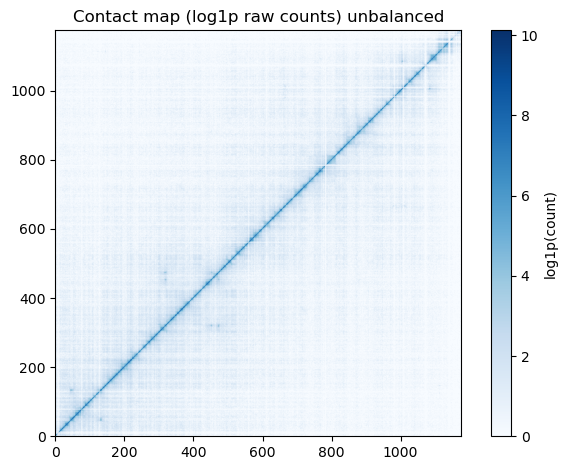

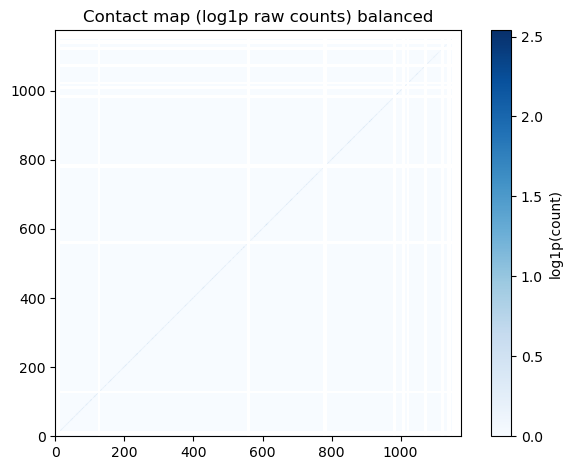

In [10]:
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_balanced.20kb.cool")


mat = clr.matrix(balance=False).fetch("2L_JJg14_057")

print("Matrix stats:")
print(f"Max value: {np.max(mat)}")
print(f"Min value: {np.min(mat)}")
print(f"NaNs present: {np.isnan(mat).any()}")
print(f"Rows with all zeros: {np.sum(np.all(mat == 0, axis=1))}")
print(f"Columns with all zeros: {np.sum(np.all(mat == 0, axis=0))}")

plt.imshow(np.log1p(mat), cmap="Blues", origin="lower")
plt.title("Contact map (log1p raw counts) unbalanced")
plt.colorbar(label='log1p(count)')
plt.tight_layout()
plt.show()

mat = clr.matrix(balance=True).fetch("2L_JJg14_057")
mat = np.clip(mat, 0, np.percentile(mat, 99))  

plt.imshow(np.log1p(mat), cmap="Blues", origin="lower")
plt.title("Contact map (log1p raw counts) balanced")
plt.colorbar(label='log1p(count)')
plt.tight_layout()
plt.show()


P(s) curves

INFO:root:creating a Pool of 2 workers
/tmp/ipykernel_59219/3854941717.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cvd_smooth_agg['balanced.avg.smoothed'].loc[cvd_smooth_agg['dist'] < 2] = np.nan


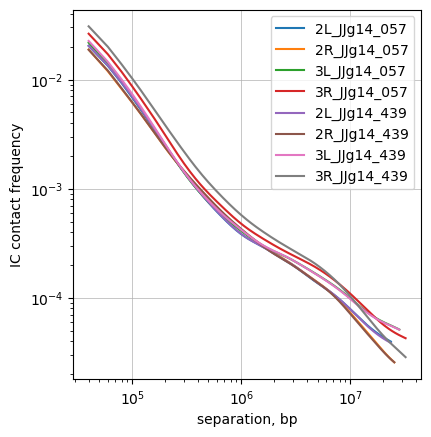

In [11]:
chroms = ["2L_JJg14_057", "2L_JJg14_439", "2R_JJg14_057", "2R_JJg14_439"]  
chromsizes_path = "/data/alhajabed/FlyHiC/PoreC/diploid_genome.chromsizes.v2"
chromsizes = pd.read_csv(chromsizes_path, sep="\t", header=None, names=["chrom", "size"])

clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_diploidGenome.20kb.cool")

# compute P(s) curves
cvd_smooth_agg = cooltools.expected_cis(
    clr=clr,
    view_df=None,
    smooth=True,
    aggregate_smoothed=True,
    smooth_sigma=0.1,
    nproc=2
    )

# filter short distances
cvd_smooth_agg['balanced.avg.smoothed'].loc[cvd_smooth_agg['dist'] < 2] = np.nan

# plot
fig, ax = plt.subplots(1,1)

for region in chromsizes['chrom']:
    ax.loglog(
        cvd_smooth_agg['dist_bp'].loc[cvd_smooth_agg['region1']==region],
        cvd_smooth_agg['balanced.avg.smoothed'].loc[cvd_smooth_agg['region1']==region],
    )
    ax.set(
        xlabel='separation, bp',
        ylabel='IC contact frequency')
    ax.set_aspect(1.0)
    ax.grid(lw=0.5)

ax.legend(chromsizes['chrom'], loc='upper right')